In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import seaborn.objects as so

import humanize

import json

# Data processing

**Project :** School Mappers

**Milestone :** 3

Buildin on the [data analysis](Milestone1.ipynb) done in Milestone 1, we are going to process the data, from multiple datasets, in order to get a reduced dataset countaining only the data needed in the visualisation.

We will want to have the following data points :

**For countries :**

- Name
- GDP/Capita
- HDI
- Population
- GINI index
- Income statistics
- Enrolment
- Dropout
- Gov. Expenditure on education
- % of public schools
- Litteracy rate
- School life expectancy
- PISA score

**For schools :**
- Name
- Country
- City
- Latitude
- Longitude
- Access to health infra.
- Access to food
- Access to sport rooms
- Access to science lab
- Classroom picture
- Cost for parents
- Students per class
- Subjects availlable
- School times
- Average cost of house
- Satellite image

In addition, where possible, the variables will be divided (e.g. Dropout amoung boys and girls, etc...)

## Data structure

We will use the following data structure :

| Country | Variable | Detail | Description | Value | Source | Year |
|---------|----------|--------|------------------|-------|--------|------|
| US      | Name     | /      | / | United States of America|/|/|
| US      | GDP_per_capita | / | / | 8950000000 | WorldBank | 2023 |
| US      | Enrolment | Total | ... | 85 | WorldBank | 2023 |
| US      | Enrolment | Female | ... | 87 | WorldBank | 2023 |
| US      | Enrolment | Male | ... | 83 | WorldBank | 2023 |
|...      |...|...|...|...|

Or for schools :
| School | Variable | Value | Source | Year |
|---------|----------|-------|--------|------|
| US_JB      | Name     |J. Biden School|/|/|
| US_JB      | Number of students | 850 | School website | 2023 |
|...      |...|...|...|...|


## Country data
### World Bank's EdStats

Our main dataset is the **World Bank's EdStats**: [Education Statistics](https://datacatalog.worldbank.org/search/dataset/0038480/education-statistics). Given the size of the dataset, the [csv files](https://databank.worldbank.org/data/download/EdStats_CSV.zip) are supposed to be in the folder `data` :
```bash
├───data
│       EdStatsCountry-Series.csv
│       EdStatsCountry.csv
│       EdStatsData.csv
│       EdStatsFootNote.csv
│       EdStatsSeries.csv
│       ...
```

In [2]:
PATH = "./data/"

# Loading the EdStats data set from the World Bank
countries = pd.read_csv(PATH+ "EdStatsCountry.csv")
country_series = pd.read_csv(PATH+"EdStatsCountry-Series.csv")
data = pd.read_csv(PATH+"EdStatsData.csv")
foot_note = pd.read_csv(PATH+"EdStatsFootNote.csv")
series = pd.read_csv(PATH+"EdStatsSeries.csv")

In [3]:
# Data
series_code = {
    "GDP/Capita" : {"Total" : "NY.GDP.PCAP.PP.CD"},
    "Population" : {"Total" : "SP.POP.TOTL"},
    "Enrolment" : {
        "Total_secondary" : "SE.SEC.NENR",
        "Female_secondary" : "SE.SEC.NENR.FE",
        "Male_secondary" : "SE.SEC.NENR.MA",
        "Total_primary" : "SE.PRM.NENR",
        "Female_primary" : "SE.PRM.NENR.FE",
        "Male_primary" : "SE.PRM.NENR.MA"
    },
    "Dropout" : {"Total" : "UIS.DR.2.GPV.T"},
    "Gov. Expenditure on education" : {
        "Total": "SE.XPD.TOTL.GD.ZS",
        "Primary" : "SE.XPD.PRIM.PC.ZS",
        "Secondary" : "SE.XPD.SECO.PC.ZS",
        "Tertiary" : "SE.XPD.TERT.PC.ZS",
    }, 
    "Litteracy rate" : {
        "Total" : "SE.ADT.LITR.ZS",
        "Male" : "SE.ADT.LITR.MA.ZS",
        "Female" : "SE.ADT.LITR.FE.ZS"
    }, 
    "School life expectancy" : {
        "Total" : "SE.SCH.LIFE",
        "Male" : "SE.SCH.LIFE.MA",
        "Female" : "SE.SCH.LIFE.FE"
    },
    "Private school enrolment"  : {
        "Primary" : "SE.PRM.PRIV.ZS",
        "Secondary" : "SE.SEC.PRIV.ZS"
    },
    "PISA score" : {"Total" : "LO.PISA.MAT"},
    "PISA repartition" : {
        0 : "LO.PISA.MAT.0",
        1 : "LO.PISA.MAT.1",
        2 : "LO.PISA.MAT.2",
        3 : "LO.PISA.MAT.3",
        4 : "LO.PISA.MAT.4",
        5 : "LO.PISA.MAT.5",
        6 : "LO.PISA.MAT.6",
    }
}


countries = ["USA", "MEX", "JPN", "IND", "CHE"]

keys = pd.DataFrame.from_dict(series_code).unstack().dropna().reset_index()
keys.columns =["Variable", "Detail", "Code"]
keys

,Variable,Detail,Code
0,GDP/Capita,Total,NY.GDP.PCAP.PP.CD
1,Population,Total,SP.POP.TOTL
2,Enrolment,Total_secondary,SE.SEC.NENR
3,Enrolment,Female_secondary,SE.SEC.NENR.FE
4,Enrolment,Male_secondary,SE.SEC.NENR.MA
5,Enrolment,Total_primary,SE.PRM.NENR
6,Enrolment,Female_primary,SE.PRM.NENR.FE
7,Enrolment,Male_primary,SE.PRM.NENR.MA
8,Dropout,Total,UIS.DR.2.GPV.T
9,Gov. Expenditure on education,Total,SE.XPD.TOTL.GD.ZS


In [4]:
#Rework the data df to have the year and values in separate columns
new_data = data.drop(["Indicator Name", "Country Name"], axis=1).set_index(["Indicator Code", "Country Code"]).rename_axis("Year", axis=1).stack().rename("Value").reset_index()
new_data["Year"] = pd.to_numeric(new_data["Year"], downcast="integer")

In [5]:
# Filtering data and take the last availlable year
df = new_data.loc[new_data["Country Code"].isin(countries) & new_data["Indicator Code"].isin(keys["Code"])].sort_values("Year").groupby(["Indicator Code", "Country Code"]).last().convert_dtypes()
df.reset_index(inplace=True)
df.head(10)

,Indicator Code,Country Code,Year,Value
0,LO.PISA.MAT,CHE,2015,521.2506
1,LO.PISA.MAT,JPN,2015,532.4399
2,LO.PISA.MAT,MEX,2015,408.0235
3,LO.PISA.MAT,USA,2015,469.6285
4,LO.PISA.MAT.0,CHE,2015,4.920916
5,LO.PISA.MAT.0,JPN,2015,2.939571
6,LO.PISA.MAT.0,MEX,2015,25.533511
7,LO.PISA.MAT.0,USA,2015,10.584118
8,LO.PISA.MAT.1,CHE,2015,10.859171
9,LO.PISA.MAT.1,JPN,2015,7.752583


In [6]:
# Reshaping the data to the desired shape

# Adding the variable and detail columns from keys dataframe
country_data = pd.merge(keys, df, how="outer", left_on = "Code", right_on="Indicator Code")

#Adding description
country_data = country_data.merge(series[["Series Code", "Short definition", "Indicator Name", "Source"]], how="left", left_on="Indicator Code", right_on = "Series Code")
country_data["Description"] = country_data["Short definition"].fillna(country_data["Indicator Name"])

#Filling the source column
country_data["Source"].fillna("World Bank EdStat", inplace=True)

# Cleaning
country_data["Country"] = country_data["Country Code"]
country_data = country_data.drop(["Code", "Indicator Code", "Series Code", "Country Code", "Short definition", "Indicator Name"], axis=1)
country_data = country_data[["Variable", "Detail", "Country","Value", "Year", 'Description', 'Source']].copy(deep=True)

country_data

C:\Users\arsju\AppData\Local\Temp\ipykernel_107748\3898727733.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  country_data["Source"].fillna("World Bank EdStat", inplace=True)


,Variable,Detail,Country,Value,Year,Description,Source
0,PISA score,Total,CHE,521.2506,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
1,PISA score,Total,JPN,532.4399,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
2,PISA score,Total,MEX,408.0235,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
3,PISA score,Total,USA,469.6285,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
4,PISA repartition,0,CHE,4.920916,2015,Percentage of 15-year-old students below the l...,OECD Programme for International Student Asses...
...,...,...,...,...,...,...,...
122,Population,Total,USA,323127513.0,2016,"Population, total",(1) United Nations Population Division. World ...
123,Dropout,Total,CHE,1.78322,2013,Cumulative drop-out rate to the last grade of ...,UNESCO Institute for Statistics
124,Dropout,Total,IND,2.98722,2010,Cumulative drop-out rate to the last grade of ...,UNESCO Institute for Statistics
125,Dropout,Total,JPN,0.07977,1994,Cumulative drop-out rate to the last grade of ...,UNESCO Institute for Statistics


c:\Users\arsju\anaconda3\envs\Dataviz\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


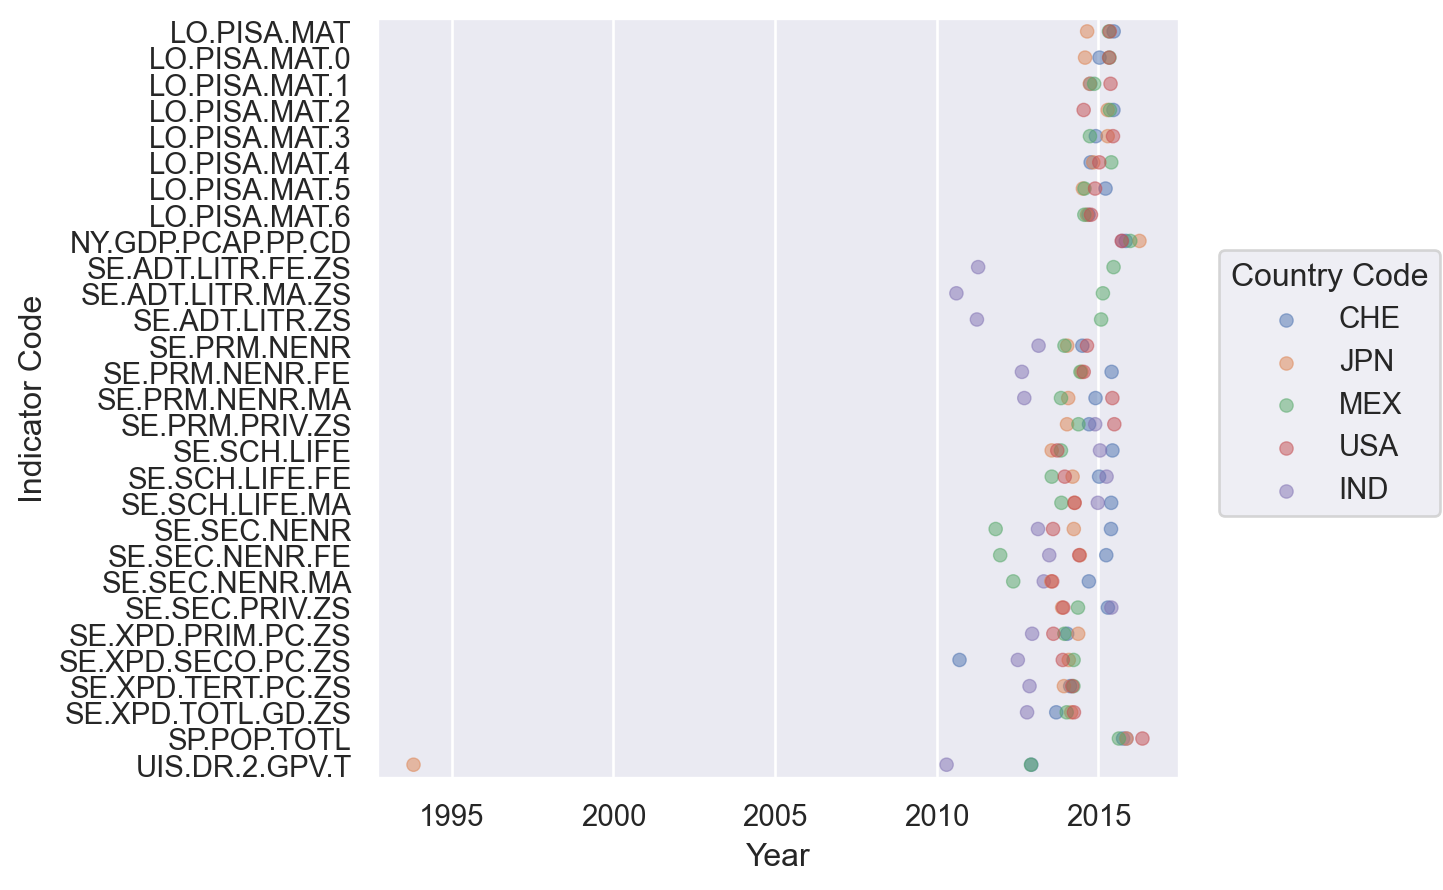

In [7]:
# Plot to check years
(
    so.Plot(df, x="Year", y="Indicator Code", color="Country Code")
    .add(so.Dot(alpha=0.5, pointsize=5), so.Jitter(x=1))
    .plot()
)

We see many missing values, let's quantify it. We also see that JPN has some very old values

In [8]:
country_data.pivot_table(index=["Variable", "Detail"], columns ="Country", values="Year")

Country                                            CHE     IND     JPN  \
Variable                      Detail                                     
Dropout                       Total             2013.0  2010.0  1994.0   
Enrolment                     Female_primary    2015.0  2013.0  2014.0   
                              Female_secondary  2015.0  2013.0  2014.0   
                              Male_primary      2015.0  2013.0  2014.0   
                              Male_secondary    2015.0  2013.0  2014.0   
                              Total_primary     2015.0  2013.0  2014.0   
                              Total_secondary   2015.0  2013.0  2014.0   
GDP/Capita                    Total             2016.0  2016.0  2016.0   
Gov. Expenditure on education Primary           2014.0  2013.0  2014.0   
                              Secondary         2011.0  2013.0  2014.0   
                              Tertiary          2014.0  2013.0  2014.0   
                              Total             2014.0  2013.0  2014.0   
Litteracy rate                Female              <NA>  2011.0    <NA>   
                              Male                <NA>  2011.0    <NA>   
                              Total               <NA>  2011.0    <NA>   
PISA repartition              0                 2015.0    <NA>  2015.0   
                              1                 2015.0    <NA>  2015.0   
                              2                 2015.0    <NA>  2015.0   
                              3                 2015.0    <NA>  2015.0   
                              4                 2015.0    <NA>  2015.0   
                              5                 2015.0    <NA>  2015.0   
                              6                 2015.0    <NA>  2015.0   
PISA score                    Total             2015.0    <NA>  2015.0   
Population                    Total             2016.0  2016.0  2016.0   
Private school enrolment      Primary           2015.0  2015.0  2014.0   
                              Secondary         2015.0  2015.0  2014.0   
School life expectancy        Female            2015.0  2015.0  2014.0   
                              Male              2015.0  2015.0  2014.0   
                              Total             2015.0  2015.0  2014.0   

Country                                            MEX     USA  
Variable                      Detail                            
Dropout                       Total             2013.0    <NA>  
Enrolment                     Female_primary    2014.0  2015.0  
                              Female_secondary  2012.0  2014.0  
                              Male_primary      2014.0  2015.0  
                              Male_secondary    2012.0  2014.0  
                              Total_primary     2014.0  2015.0  
                              Total_secondary   2012.0  2014.0  
GDP/Capita                    Total             2016.0  2016.0  
Gov. Expenditure on education Primary           2014.0  2014.0  
                              Secondary         2014.0  2014.0  
                              Tertiary          2014.0  2014.0  
                              Total             2014.0  2014.0  
Litteracy rate                Female            2015.0    <NA>  
                              Male              2015.0    <NA>  
                              Total             2015.0    <NA>  
PISA repartition              0                 2015.0  2015.0  
                              1                 2015.0  2015.0  
                              2                 2015.0  2015.0  
                              3                 2015.0  2015.0  
                              4                 2015.0  2015.0  
                              5                 2015.0  2015.0  
                              6                 2015.0  2015.0  
PISA score                    Total             2015.0  2015.0  
Population                    Total             2016.0  2016.0  
Private school 

We see that there are discrepancies...
- in litteracy data, which is missing in US, Switzerland and Japan.
- in primary school enrolment in India.
- in dropout rates in US.

And very old data in Japan, for the dropout rate and the gender data for the enrolment rate. We will drop data from before 2010 :

In [9]:
# Dropping data before 2010
country_data = country_data[country_data.Year >= 2010]


In [10]:
# Adding the name of the countries
def name_row(country, name):
    return ({"Variable" : "Name",
        "Detail": "/",
        "Country": country,
        "Value" : name,
        "Year" : 2024,
        "Source" : "World Bank"})

for country in countries : 
    name = data.loc[data["Country Code"] == country, "Country Name"].unique()[0]
    country_data = country_data._append(name_row(country, name), ignore_index=True)


In [11]:
country_data.pivot_table(index=["Variable", "Detail"], columns ="Country", values="Value", aggfunc="first")

Country                                                  CHE           IND  \
Variable                      Detail                                         
Dropout                       Total                  1.78322       2.98722   
Enrolment                     Female_primary       93.168762     92.919998   
                              Female_secondary     83.826248     62.177921   
                              Male_primary         93.456146     91.666702   
                              Male_secondary       85.952148     61.375198   
                              Total_primary        93.316322     92.258461   
                              Total_secondary      84.916489     61.755241   
GDP/Capita                    Total             63741.452507    6583.37205   
Gov. Expenditure on education Primary               25.51424       9.76755   
                              Secondary             26.01421        16.813   
                              Tertiary             38.026119       49.1511   
                              Total                  5.09608       3.84236   
Litteracy rate                Female                     NaN      59.27732   
                              Male                       NaN      78.87723   
                              Total                      NaN      69.30256   
Name                          /                  Switzerland         India   
PISA repartition              0                     4.920916           NaN   
                              1                    10.859171           NaN   
                              2                    18.097667           NaN   
                              3                    23.615354           NaN   
                              4                    23.260205           NaN   
                              5                    13.951727           NaN   
                              6                      5.29496           NaN   
PISA score                    Total                 521.2506           NaN   
Population                    Total                8372098.0  1324171354.0   
Private school enrolment      Primary                5.59648     34.780628   
                              Secondary             12.00937     50.172451   
School life expectancy        Female                16.12418      12.32094   
                              Male                 16.213301      11.63991   
                              Total                 16.16889      11.96153   

Country                                                  JPN           MEX  \
Variable                      Detail                                         
Dropout                       Total                      NaN      10.20194   
Enrolment                     Female_primary        99.95002       95.4524   
                              Female_secondary     99.438759     68.778831   
                              Male_primary         99.949997     94.679367   
                              Male_secondary       98.665428     66.084373   
                              Total_primary        99.950012     95.058296   
                              Total_secondary      99.042671     67.409737   
GDP/Capita                    Total             41476.360298  17877.357845   
Gov. Expenditure on education Primary                22.5268      14.91205   
                              Secondary            23.915859     16.411209   
                              Tertiary             24.578011     41.653961   
                              Total                  3.59184       5.31348   
Litteracy rate                Female                     NaN       93.4855   
                              Male                       NaN      95.54933   
                              Total                      NaN      94.47228   
Name                          /                        Japan        Mexico   
PISA repartition              0                     2.939571     25.533511   
                     

### Other data sources

We still need : 
- HDI
- GINI index
- Income statistics

We will use the United Nation Human Development Report for the first 3 variables. However, we 

#### United Nation's Human Development report dataset

This dataset can be found [here](https://hdr.undp.org/data-center/documentation-and-downloads), and should be put in the data folder (`All tables` and `All composite indices and components time series (1990-2022)`): 
```bash
├───data
│       EdStatsCountry-Series.csv
│       EdStatsCountry.csv
│       EdStatsData.csv
│       EdStatsFootNote.csv
│       EdStatsSeries.csv
│       HDR23-24_Composite_indices_complete_time_series.csv
│       HDR23-24_Statistical_Annex_Tables_1-7.xlsx
│       ...
```

In [12]:
## Get HDI value and rank from hdr file
## ------------------------------------

hdr = pd.read_csv("data/HDR23-24_Composite_indices_complete_time_series.csv", encoding = "cp1252")

# Select columns related to HDI and countries we want :
hdi = hdr.loc[hdr.country.isin(["Switzerland", "United States", "Japan", "India", "Mexico"]),["country", "hdi_rank_2022", "hdi_2022"]].copy(deep=True)
display(hdi.head(1))

# Unstack
hdi = hdi.set_index("country").unstack().reset_index().rename({"level_0":"Variable", 0:"Value", "country":"Country"}, axis=1)
display(hdi.head(1))


# Get year and rename the variables names
split= hdi.Variable.str.rsplit("_", n=1)
hdi["Year"] = split.apply(lambda x: x[-1])
hdi["Variable"] = split.apply(lambda x: x[0]).map({"hdi_rank": "HDI Rank", "hdi":"HDI"})
display(hdi.head(1))

# Add detail column
hdi["Detail"] = "/"
display(hdi.head(1))

# Add source column
hdi["Source"] = "Human Development Report (United Nations)"
display(hdi.head(1))

# Add description
hdi["Description"] = hdi["Variable"].map({"HDI Rank": "HDI rank over 193 countries", "HDI":"Human Development Index (value)"})
display(hdi.head(1))

# Replace countries with country code :
hdi["Country"] = hdi.Country.map({"Switzerland" : "CHE", "United States":"USA", "Japan":"JPN", "India":"IND", "Mexico":"MEX"})

display(hdi)

## Merge with country data :
country_data = country_data._append(hdi)

display(country_data)

# Check country data with a pivot table
country_data.pivot_table(index=["Variable", "Detail"], columns ="Country", values="Value", aggfunc="first")

,country,hdi_rank_2022,hdi_2022
77,India,134.0,0.644


,Variable,Country,Value
0,hdi_rank_2022,India,134.0


,Variable,Country,Value,Year
0,HDI Rank,India,134.0,2022


,Variable,Country,Value,Year,Detail
0,HDI Rank,India,134.0,2022,/


,Variable,Country,Value,Year,Detail,Source
0,HDI Rank,India,134.0,2022,/,Human Development Report (United Nations)


,Variable,Country,Value,Year,Detail,Source,Description
0,HDI Rank,India,134.0,2022,/,Human Development Report (United Nations),HDI rank over 193 countries


,Variable,Country,Value,Year,Detail,Source,Description
0,HDI Rank,IND,134.000,2022,/,Human Development Report (United Nations),HDI rank over 193 countries
1,HDI Rank,JPN,24.000,2022,/,Human Development Report (United Nations),HDI rank over 193 countries
2,HDI Rank,MEX,77.000,2022,/,Human Development Report (United Nations),HDI rank over 193 countries
3,HDI Rank,CHE,1.000,2022,/,Human Development Report (United Nations),HDI rank over 193 countries
4,HDI Rank,USA,20.000,2022,/,Human Development Report (United Nations),HDI rank over 193 countries
5,HDI,IND,0.644,2022,/,Human Development Report (United Nations),Human Development Index (value)
6,HDI,JPN,0.920,2022,/,Human Development Report (United Nations),Human Development Index (value)
7,HDI,MEX,0.781,2022,/,Human Development Report (United Nations),Human Development Index (value)
8,HDI,CHE,0.967,2022,/,Human Development Report (United Nations),Human Development Index (value)
9,HDI,USA,0.927,2022,/,Human Development Report (United Nations),Human Development Index (value)


,Variable,Detail,Country,Value,Year,Description,Source
0,PISA score,Total,CHE,521.2506,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
1,PISA score,Total,JPN,532.4399,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
2,PISA score,Total,MEX,408.0235,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
3,PISA score,Total,USA,469.6285,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
4,PISA repartition,0,CHE,4.920916,2015,Percentage of 15-year-old students below the l...,OECD Programme for International Student Asses...
...,...,...,...,...,...,...,...
5,HDI,/,IND,0.644,2022,Human Development Index (value),Human Development Report (United Nations)
6,HDI,/,JPN,0.92,2022,Human Development Index (value),Human Development Report (United Nations)
7,HDI,/,MEX,0.781,2022,Human Development Index (value),Human Development Report (United Nations)
8,HDI,/,CHE,0.967,2022,Human Development Index (value),Human Development Report (United Nations)


Country                                                  CHE           IND  \
Variable                      Detail                                         
Dropout                       Total                  1.78322       2.98722   
Enrolment                     Female_primary       93.168762     92.919998   
                              Female_secondary     83.826248     62.177921   
                              Male_primary         93.456146     91.666702   
                              Male_secondary       85.952148     61.375198   
                              Total_primary        93.316322     92.258461   
                              Total_secondary      84.916489     61.755241   
GDP/Capita                    Total             63741.452507    6583.37205   
Gov. Expenditure on education Primary               25.51424       9.76755   
                              Secondary             26.01421        16.813   
                              Tertiary             38.026119       49.1511   
                              Total                  5.09608       3.84236   
HDI                           /                        0.967         0.644   
HDI Rank                      /                          1.0         134.0   
Litteracy rate                Female                     NaN      59.27732   
                              Male                       NaN      78.87723   
                              Total                      NaN      69.30256   
Name                          /                  Switzerland         India   
PISA repartition              0                     4.920916           NaN   
                              1                    10.859171           NaN   
                              2                    18.097667           NaN   
                              3                    23.615354           NaN   
                              4                    23.260205           NaN   
                              5                    13.951727           NaN   
                              6                      5.29496           NaN   
PISA score                    Total                 521.2506           NaN   
Population                    Total                8372098.0  1324171354.0   
Private school enrolment      Primary                5.59648     34.780628   
                              Secondary             12.00937     50.172451   
School life expectancy        Female                16.12418      12.32094   
                              Male                 16.213301      11.63991   
                              Total                 16.16889      11.96153   

Country                                                  JPN           MEX  \
Variable                      Detail                                         
Dropout                       Total                      NaN      10.20194   
Enrolment                     Female_primary        99.95002       95.4524   
                              Female_secondary     99.438759     68.778831   
                              Male_primary         99.949997     94.679367   
                              Male_secondary       98.665428     66.084373   
                              Total_primary        99.950012     95.058296   
                              Total_secondary      99.042671     67.409737   
GDP/Capita                    Total             41476.360298  17877.357845   
Gov. Expenditure on education Primary                22.5268      14.91205   
                              Secondary            23.915859     16.411209   
                              Tertiary             24.578011     41.653961   
                              Total                  3.59184       5.31348   
HDI                           /                         0.92         0.781   
HDI Rank                      /                         24.0          77.0   
Litteracy rate                Female                     NaN       93.4855   
                     

In [13]:
## Get information on income statistics of the country
## ---------------------------------------------------

# Here, we have to read an excel
income_hdr = pd.read_excel("data/HDR23-24_Statistical_Annex_Tables_1-7.xlsx", sheet_name="IHDI", header=3)[["Unnamed: 1", "Poorest 40 percent", "Richest 10 percent", " Richest 1 percent", "Gini coefficient"]].rename({"Unnamed: 1": "Country"}, axis=1)

# Keep year data for later
year_map = income_hdr.loc[0]

# Select the countries we want
income_hdr = income_hdr.loc[income_hdr.Country.isin(["Switzerland", "United States", "Japan", "India", "Mexico"])]
display(income_hdr)

# Unstack
income_hdr = income_hdr.set_index("Country").unstack().reset_index().rename({"level_0":"Variable", 0:"Value"}, axis=1)

# Get year and remap the variable into variable / detail
income_hdr["Year"] = income_hdr.Variable.map(year_map)
income_hdr["Detail"] = income_hdr.Variable.apply(lambda var : "/" if var == "Gini coefficient" else var)
income_hdr["Variable"] = income_hdr.Variable.apply(lambda var : "Gini" if var == "Gini coefficient" else "Income")

display(income_hdr.sample(5))

# Add source and description
income_hdr["Source"] = income_hdr["Variable"].map({"Income": "World Bank (2023)", "Gini":"World Inequality Database (2022)"})
income_hdr["Description"] = income_hdr.apply(lambda row: f"Income shares (%): Percentage share of income (or consumption) that accrues to the {row['Detail'].lower()} of the population" if row['Variable']=="Income" else "Gini coefficient: Measure of the deviation of the distribution of income among individuals or households in a country from a perfectly equal distribution. A value of 0 represents absolute equality, a value of 100 absolute inequality.", axis=1)

display(income_hdr.sample(5))

# Replace countries with country code :
income_hdr["Country"] = income_hdr.Country.map({"Switzerland" : "CHE", "United States":"USA", "Japan":"JPN", "India":"IND", "Mexico":"MEX"})

display(income_hdr)

## Merge with country data :
country_data = country_data._append(income_hdr)

display(country_data)

# Check country data with a pivot table
country_data.pivot_table(index=["Variable", "Detail"], columns ="Country", values="Value", aggfunc="first")

,Country,Poorest 40 percent,Richest 10 percent,Richest 1 percent,Gini coefficient
2,Switzerland,19.9,25.8,9.86,33.1
22,United States,16.6,30.1,19.03,39.8
25,Japan,20.5,26.4,12.86,32.9
79,Mexico,14.3,35.5,26.81,45.4
137,India,20,27.8,21.73,34.2


,Variable,Country,Value,Year,Detail
15,Gini,Switzerland,33.1,2010-2022,/
19,Gini,India,34.2,2010-2022,/
18,Gini,Mexico,45.4,2010-2022,/
1,Income,United States,16.6,2010-2022,Poorest 40 percent
4,Income,India,20,2010-2022,Poorest 40 percent


,Variable,Country,Value,Year,Detail,Source,Description
15,Gini,Switzerland,33.1,2010-2022,/,World Inequality Database (2022),Gini coefficient: Measure of the deviation of ...
5,Income,Switzerland,25.8,2010-2022,Richest 10 percent,World Bank (2023),Income shares (%): Percentage share of income ...
11,Income,United States,19.03,2021,Richest 1 percent,World Bank (2023),Income shares (%): Percentage share of income ...
16,Gini,United States,39.8,2010-2022,/,World Inequality Database (2022),Gini coefficient: Measure of the deviation of ...
17,Gini,Japan,32.9,2010-2022,/,World Inequality Database (2022),Gini coefficient: Measure of the deviation of ...


,Variable,Country,Value,Year,Detail,Source,Description
0,Income,CHE,19.9,2010-2022,Poorest 40 percent,World Bank (2023),Income shares (%): Percentage share of income ...
1,Income,USA,16.6,2010-2022,Poorest 40 percent,World Bank (2023),Income shares (%): Percentage share of income ...
2,Income,JPN,20.5,2010-2022,Poorest 40 percent,World Bank (2023),Income shares (%): Percentage share of income ...
3,Income,MEX,14.3,2010-2022,Poorest 40 percent,World Bank (2023),Income shares (%): Percentage share of income ...
4,Income,IND,20,2010-2022,Poorest 40 percent,World Bank (2023),Income shares (%): Percentage share of income ...
5,Income,CHE,25.8,2010-2022,Richest 10 percent,World Bank (2023),Income shares (%): Percentage share of income ...
6,Income,USA,30.1,2010-2022,Richest 10 percent,World Bank (2023),Income shares (%): Percentage share of income ...
7,Income,JPN,26.4,2010-2022,Richest 10 percent,World Bank (2023),Income shares (%): Percentage share of income ...
8,Income,MEX,35.5,2010-2022,Richest 10 percent,World Bank (2023),Income shares (%): Percentage share of income ...
9,Income,IND,27.8,2010-2022,Richest 10 percent,World Bank (2023),Income shares (%): Percentage share of income ...


,Variable,Detail,Country,Value,Year,Description,Source
0,PISA score,Total,CHE,521.2506,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
1,PISA score,Total,JPN,532.4399,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
2,PISA score,Total,MEX,408.0235,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
3,PISA score,Total,USA,469.6285,2015,Average score of 15-year-old students on the P...,OECD Programme for International Student Asses...
4,PISA repartition,0,CHE,4.920916,2015,Percentage of 15-year-old students below the l...,OECD Programme for International Student Asses...
...,...,...,...,...,...,...,...
15,Gini,/,CHE,33.1,2010-2022,Gini coefficient: Measure of the deviation of ...,World Inequality Database (2022)
16,Gini,/,USA,39.8,2010-2022,Gini coefficient: Measure of the deviation of ...,World Inequality Database (2022)
17,Gini,/,JPN,32.9,2010-2022,Gini coefficient: Measure of the deviation of ...,World Inequality Database (2022)
18,Gini,/,MEX,45.4,2010-2022,Gini coefficient: Measure of the deviation of ...,World Inequality Database (2022)


Country                                                    CHE           IND  \
Variable                      Detail                                           
Dropout                       Total                    1.78322       2.98722   
Enrolment                     Female_primary         93.168762     92.919998   
                              Female_secondary       83.826248     62.177921   
                              Male_primary           93.456146     91.666702   
                              Male_secondary         85.952148     61.375198   
                              Total_primary          93.316322     92.258461   
                              Total_secondary        84.916489     61.755241   
GDP/Capita                    Total               63741.452507    6583.37205   
Gini                          /                           33.1          34.2   
Gov. Expenditure on education Primary                 25.51424       9.76755   
                              Secondary               26.01421        16.813   
                              Tertiary               38.026119       49.1511   
                              Total                    5.09608       3.84236   
HDI                           /                          0.967         0.644   
HDI Rank                      /                            1.0         134.0   
Income                         Richest 1 percent          9.86         21.73   
                              Poorest 40 percent          19.9            20   
                              Richest 10 percent          25.8          27.8   
Litteracy rate                Female                       NaN      59.27732   
                              Male                         NaN      78.87723   
                              Total                        NaN      69.30256   
Name                          /                    Switzerland         India   
PISA repartition              0                       4.920916           NaN   
                              1                      10.859171           NaN   
                              2                      18.097667           NaN   
                              3                      23.615354           NaN   
                              4                      23.260205           NaN   
                              5                      13.951727           NaN   
                              6                        5.29496           NaN   
PISA score                    Total                   521.2506           NaN   
Population                    Total                  8372098.0  1324171354.0   
Private school enrolment      Primary                  5.59648     34.780628   
                              Secondary               12.00937     50.172451   
School life expectancy        Female                  16.12418      12.32094   
                              Male                   16.213301      11.63991   
                              Total                   16.16889      11.96153   

Country                                                    JPN           MEX  \
Variable                      Detail                                           
Dropout                       Total                        NaN      10.20194   
Enrolment                     Female_primary          99.95002       95.4524   
                              Female_secondary       99.438759     68.778831   
                              Male_primary           99.949997     94.679367   
                              Male_secondary         98.665428     66.084373   
                              Total_primary          99.950012     95.058296   
                              Total_secondary        99.042671     67.409737   
GDP/Capita                    Total               41476.360298  17877.357845   
Gini                          /                           32.9          45.4   
Gov. Expenditure on education Primary                  22.5268      14.91205   

### Format

We will add a `valueFormatted` column, with the value formated in a human readable way for each variable.

In [19]:
format_per_variable = {
    'PISA score': '{:.0f}'.format,
    'PISA repartition': '{:.2g}%'.format,
    'GDP/Capita': '{:,.0f}'.format,
    'Litteracy rate': '{:.2g}%'.format,
    'Enrolment': lambda x: '{:.4g}%'.format(x) if x > 99.9 else '{:.2g}%'.format(x),
    'Private school enrolment': '{:.2g}%'.format,
    'School life expectancy': '{:.1f}'.format,
    'Gov. Expenditure on education': '{:.2g}%'.format,
    'Population': humanize.intword,
    'Dropout': '{:.2g}%'.format,
    'Name': lambda x:x,
    'HDI Rank': '{:.0f}'.format,
    'HDI': '{:.2f}'.format,
    'Income': '{:.2g}%'.format,
    'Gini': '{:.2g}%'.format
}
country_data["valueFormatted"] = country_data.apply(lambda x: format_per_variable[x.Variable](x.Value), axis=1)
country_data.pivot_table(index=["Variable", "Detail"], columns ="Country", values="valueFormatted", aggfunc="first")

Country                                                   CHE          IND  \
Variable                      Detail                                         
Dropout                       Total                      1.8%           3%   
Enrolment                     Female_primary              93%          93%   
                              Female_secondary            84%          62%   
                              Male_primary                93%          92%   
                              Male_secondary              86%          61%   
                              Total_primary               93%          92%   
                              Total_secondary             85%          62%   
GDP/Capita                    Total                    63,741        6,583   
Gini                          /                           33%          34%   
Gov. Expenditure on education Primary                     26%         9.8%   
                              Secondary                   26%          17%   
                              Tertiary                    38%          49%   
                              Total                      5.1%         3.8%   
HDI                           /                          0.97         0.64   
HDI Rank                      /                             1          134   
Income                         Richest 1 percent         9.9%          22%   
                              Poorest 40 percent          20%          20%   
                              Richest 10 percent          26%          28%   
Litteracy rate                Female                      NaN          59%   
                              Male                        NaN          79%   
                              Total                       NaN          69%   
Name                          /                   Switzerland        India   
PISA repartition              0                          4.9%          NaN   
                              1                           11%          NaN   
                              2                           18%          NaN   
                              3                           24%          NaN   
                              4                           23%          NaN   
                              5                           14%          NaN   
                              6                          5.3%          NaN   
PISA score                    Total                       521          NaN   
Population                    Total               8.4 million  1.3 billion   
Private school enrolment      Primary                    5.6%          35%   
                              Secondary                   12%          50%   
School life expectancy        Female                     16.1         12.3   
                              Male                       16.2         11.6   
                              Total                      16.2         12.0   

Country                                                     JPN  \
Variable                      Detail                              
Dropout                       Total                         NaN   
Enrolment                     Female_primary             99.95%   
                              Female_secondary              99%   
                              Male_primary               99.95%   
                              Male_secondary                99%   
                              Total_primary              99.95%   
                              Total_secondary               99%   
GDP/Capita                    Total                      41,476   
Gini                          /                             33%   
Gov. Expenditure on education Primary                       23%   
                              Secondary                     24%   
                              Tertiary                      25%   
                              Total                        3.6%   
HDI                           

### Export

In [15]:
# Export in CSV
country_data.to_csv("data/countries_data.csv")

In [16]:
# Record export to JSON
# country_data.to_json("data/countries_data.json", orient="records")

In [17]:
# Export to JSON in a structured (country -> variable -> detail -> {value, year, description, source}) way
def export_json(filename, df):
    structured_data = []

    for i, country in enumerate(df['Country'].unique()):
        country_data = df[df['Country'] == country]
        
        country_info = {
            'id': i, # Adds an ID variable (will be used to differentiate the colors)
            'name': country,
            'PISA score': {},
            'PISA repartition': {},
            'GDP/Capita': {},
            'Litteracy rate': {},
            'Population': None,
            'HDI Rank': None,
            'HDI': None,
            'Income': {},
            'Gini': None,
            'Enrolment': {},
            'Private school enrolment': {},
            'School life expectancy': {},
            'Gov. Expenditure on education': {},
            'Dropout': None
        }
        
        for index, row in country_data.iterrows():
            variable = row['Variable']
            detail = row['Detail']
            value = row['Value']
            valueFormatted = row['valueFormatted']
            year = row['Year']
            description = row['Description']
            source = row['Source']
            
            entry = {
                'value': value,
                'valueFormatted': valueFormatted,
                'year': year,
                'description': description,
                'source': source
            }
            
            if variable in ['GDP/Capita', 'PISA score','PISA repartition', 'Litteracy rate', 'Income', 'Enrolment', 'Private school enrolment', 'School life expectancy', 'Gov. Expenditure on education']:
                if detail: 
                    if variable not in country_info:
                        country_info[variable] = {}
                    country_info[variable][detail] = entry
                else:
                    country_info[variable] = entry 
            elif variable in [ 'Population', 'HDI Rank', 'HDI', 'Gini', 'Dropout']:
                country_info[variable] = entry
            elif variable == "Name":
                country_info["name"] = value
        
        structured_data.append(country_info)

    with open(filename, 'w') as json_file:
        json.dump(structured_data, json_file, indent=4)

export_json('data/countries.json', country_data)